# Example for using concat operator on cmip6 decadal with average

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import operators as ops

## Run concat

https://docs.xarray.dev/en/stable/generated/xarray.concat.html

In [2]:
wf = ops.Concat(
        ops.Input(
                'tas', [
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r1i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r2i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r3i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r4i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r5i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r6i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r7i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r8i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r9i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r10i1p1f2.Amon.tas.gn.v20200417'
                ]
        ),
        dims="realization",
)

# optional average
wf = ops.Average(wf, dims="realization")

# optional subset
wf = ops.Subset(wf, time="1995/1995")

resp = wf.orchestrate()
resp.ok

True

**open with xarray**

In [3]:
resp.size_in_mb

1.126572608947754

In [4]:
resp.download_urls()

['http://rook4.cloud.dkrz.de:80/outputs/rook/a2b9cddc-7f1b-11ee-b6c9-fa163ed6c06f/tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_r10i1p1f2_gn_19951116-19951216.nc']

In [5]:
dsets = resp.datasets()

In [6]:
ds = dsets[0]
ds

<xarray.Dataset>
Dimensions:   (time: 2, lat: 324, bnds: 2, lon: 432)
Coordinates:
  * time      (time) object 1995-11-16 00:00:00 1995-12-16 00:00:00
  * lat       (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon       (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
    height    float64 ...
    reftime   object ...
    leadtime  (time) timedelta64[ns] ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (time, lat, bnds) float64 ...
    lon_bnds  (time, lon, bnds) float64 ...
    tas       (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                 CF-1.7 CMIP-6.2
    activity_id:                 DCPP
    branch_method:               no parent
    branch_time_in_child:        0.0
    branch_time_in_parent:       0.0
    creation_date:               2020-05-26T09:34:24Z
    ...                          ...
    license:                     CMIP6 model data produced by Met Office Hadl...
    cmor_version:                3.4.0
    forcing_description:         f2, CMIP6 v6.2.0 forcings; no ozone remapping
    physics_description:         physics from the standard model configuratio...
    initialization_description:  hindcast initialized based on observations a...
    startdate:                   s199511

**provenance**

In [7]:
prov_plot_url = resp.provenance_image()
prov_plot_url

'http://rook4.cloud.dkrz.de:80/outputs/rook/81b93b9a-7f1b-11ee-bed9-fa163ed6c06f/provenance.png'

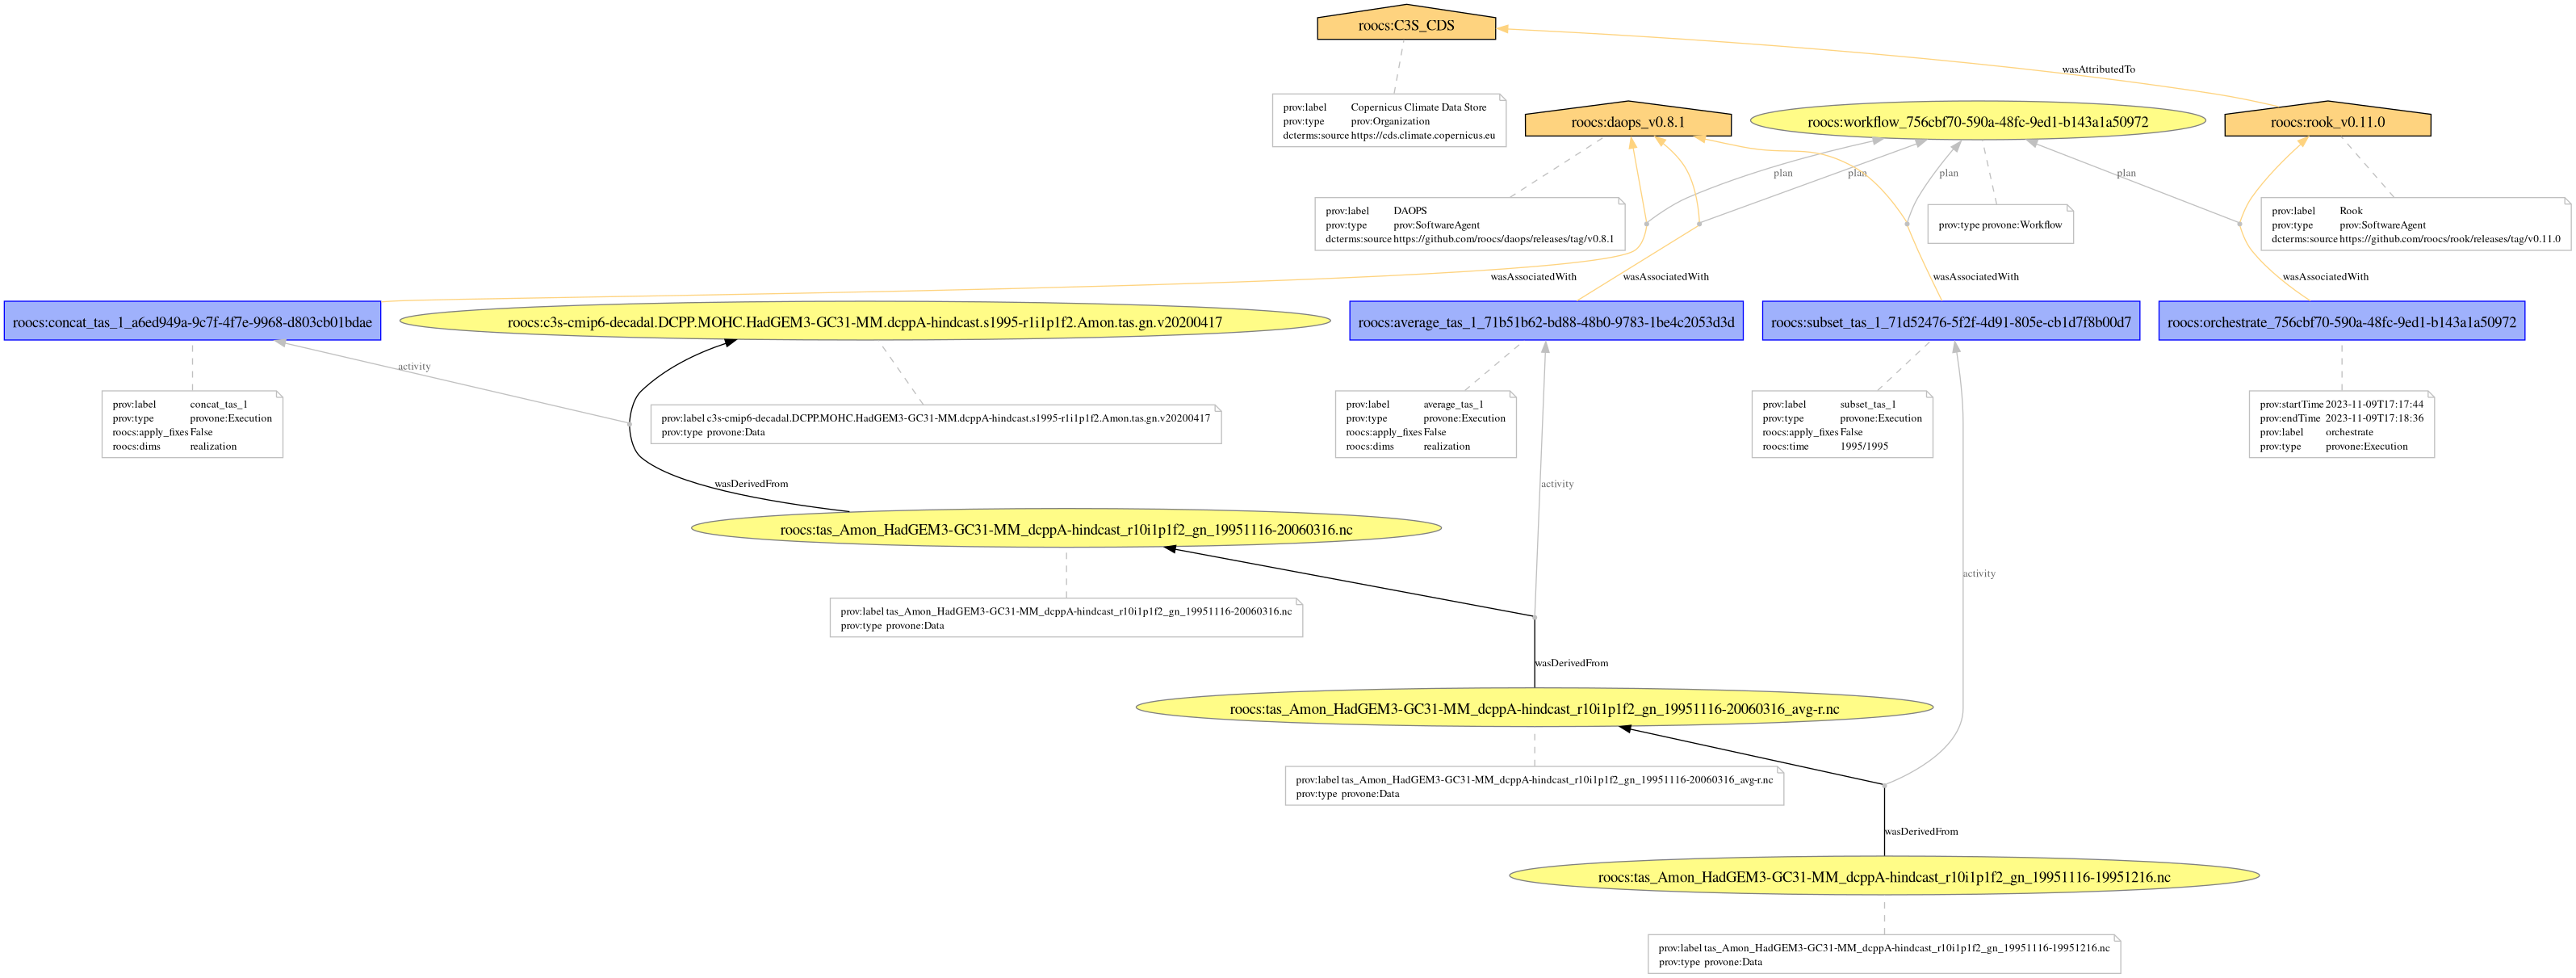

In [8]:
from IPython.display import Image
Image(prov_plot_url)

In [9]:
resp.provenance()

'http://rook4.cloud.dkrz.de:80/outputs/rook/81b93b9a-7f1b-11ee-bed9-fa163ed6c06f/provenance.json'